## Learning Rules from Data

This notebook gives an example of how rules can be learned directly from data using a form of machine learning.


We load a publicly available breast cancer diagnosis dataset that consists of features from breast cancer scan images, such as perimeter and smoothness. 

To evaluate the rules learning system, we split our dataset into training and testing (20% test). 



In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

from sklearn import metrics


seed = 10
#seed=15
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

feature_cols = list(X.columns.values)
print(feature_cols)

print(X_train.head())

print(X_train.shape)

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
567        20.60         29.33          140.10     1265.0          0.11780   
295        13.77         13.27           88.06      582.7          0.09198   
91         15.37         22.76          100.20      728.2          0.09200   
1          20.57         17.77          132.90     1326.0          0.08474   
94         15.06         19.83    

### Learning a decision tree from data 

We use a 'decision tree classifier' to induce a decision tree from the dataset. The decision tree consists of separate value sets in the underlying dataset. 

In [8]:
dl = DecisionTreeClassifier(random_state=seed)
#dl.fit(X_train, y_train)
dl = dl.fit(X_train, y_train)

y_pred = dl.predict(X_test)

print("PREDICTION")

print(y_pred)

print("GROUND TRUTH")

print(y_test.values)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

PREDICTION
[0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 0]
GROUND TRUTH
[0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1
 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 0]
Accuracy: 0.8596491228070176


### Visualising our decision tree

We can visualise the decision tree in order to see what the different decision paths are. 

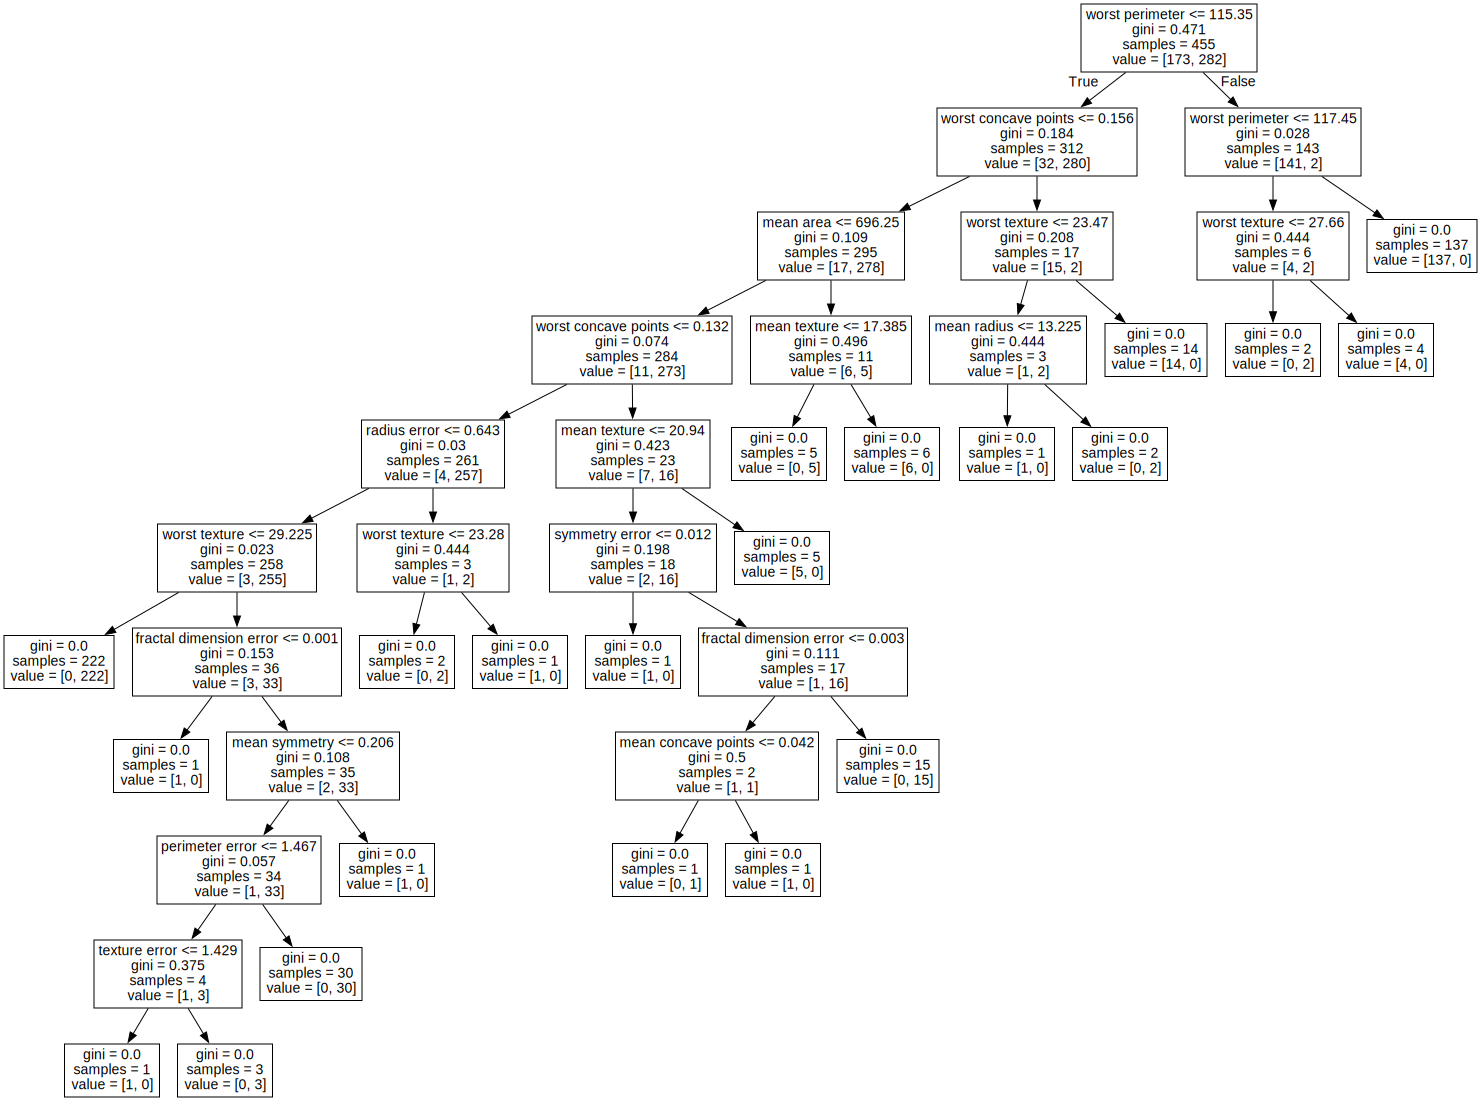

In [6]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree

from graphviz import Source
from IPython.display import SVG

graph = Source( tree.export_graphviz(dl, out_file=None, feature_names=X.columns))
SVG(graph.pipe(format='svg'))